# Презентация

[Презентация](https://disk.yandex.ru/i/t2ow73NaY0jYTQ)

# Дашборды

[Дашборд 1](https://public.tableau.com/app/profile/.57531851/viz/Final_project_16909985140720/Dashboard1?publish=yes)

[Дашборд 2](https://public.tableau.com/app/profile/.57531851/viz/Final_project_salary/Dashboard1?publish=yes)


# Банк "Метанпром" — Анализ оттока клиентов

Маркетинговый отдел обратился за помощью, чтобы определить причины оттока клиентов банков, с целью их удержания, так как удержать клиентов дешевле, чем привлекать новых

**План**:
- загрузить данные и ознакомиться с ними
- исследовательский анализ данных
- анализ распределения признаков, в тч в разрезе оттока (непрерывные - ищем отточные интервалы, категориальные/дискретные - ищем значения признака с оттоком выше, чем по банку);
- анализ портретов клиентов в разрезе оттока;
- корреляционный анализ
- формулировка и проверка гипотез
- сформулировать промежуточные выводы
- сегментация клиентов
- расставить приоритеты по сегментам клиентов, на возможное ограничение ресурсов компании
- общий вывод + рекомендации
- создание дашборда и презентации

**Информация о данных**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
Колонки:

userid — идентификатор пользователя,

score — баллы кредитного скоринга,

City — город,

Gender — пол,

Age — возраст,

Objects — количество объектов в собственности

equity — количество баллов собственности

Balance — баланс на счёте,

Products — количество продуктов, которыми пользуется клиент,

CreditCard — есть ли кредитная карта,

Loyalty / last_activity — активный клиент,

estimated_salary — заработная плата клиента,

Churn — ушёл или нет.

**Цель** - проанализировать клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

**Задачи:**
- проверка в данных пропусков, типы, аномалии, дубликаты, наименования колонок
- изучить средние значения и стандартные отклонения, выбросы
- построю графики и распределения признаков для тех, кто ушёл и тех, кто остался;
- построю матрицу корреляций и опишем портерет клиента;
- проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались;
- сформулировать промежуточные выводы по исследовательскому анализу данных
- сделаю кластеризацию пользователей для того, чтобы просегментировать клиентов как сегменты
- расставить приоритеты сегментов;
- общий вывод + рекомендации для отдела маркетинга
- создание дашборда и презентации с короткими выводами и визуализацией

## Загрузить данные, ознакомиться с ними

In [1]:
!pip install phik

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import phik
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import os

In [3]:
pth1 = 'C:\загрузки\bank_scrooge.csv'
pth2 = '/datasets/bank_scrooge.csv'
try:
    df = pd.read_csv(pth2) # на сервере открыть
except:
    if os.path.exists(pth1): 
        df = pd.read_csv(pth1) # локально открыть
    else:
        print('Какая-то ошибка')
df.sample(7)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9875,139799,785.0,Рыбинск,М,25.0,0,NaN,1,0,0,56599.92,0
8763,134893,809.0,Ярославль,М,40.0,0,44089.48,1,1,0,217586.39,1
4779,116171,906.0,Ярославль,М,25.0,0,NaN,1,1,1,178076.10,0
3682,219785,887.0,Рыбинск,Ж,29.0,4,385088.94,1,0,1,150811.70,0
8076,163175,882.0,Ярославль,М,43.0,0,NaN,2,1,0,53662.85,0
8280,158308,787.0,Ярославль,М,37.0,4,1189781.18,3,1,0,239710.49,0
8061,154869,869.0,Рыбинск,Ж,37.0,4,925384.79,2,1,0,115765.41,0


In [4]:
# приведу все колонки к нижнему регистру
df.columns = map(str.lower, df.columns)

Гендерное и городское различия лучше будет анализировать в цифровом виде.

In [5]:
df['город'] = df.loc[:, 'city']
df['пол'] = df.loc[:, 'gender']

df = pd.get_dummies(df, columns = ['город', 'пол'])
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,город_Ростов,город_Рыбинск,город_Ярославль,пол_Ж,пол_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


Теперь 1 - женский пол, 0 - мужской пол

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userid           10000 non-null  int64  
 1   score            10000 non-null  float64
 2   city             10000 non-null  object 
 3   gender           10000 non-null  object 
 4   age              9974 non-null   float64
 5   equity           10000 non-null  int64  
 6   balance          7705 non-null   float64
 7   products         10000 non-null  int64  
 8   credit_card      10000 non-null  int64  
 9   last_activity    10000 non-null  int64  
 10  est_salary       10000 non-null  float64
 11  churn            10000 non-null  int64  
 12  город_Ростов     10000 non-null  uint8  
 13  город_Рыбинск    10000 non-null  uint8  
 14  город_Ярославль  10000 non-null  uint8  
 15  пол_Ж            10000 non-null  uint8  
 16  пол_М            10000 non-null  uint8  
dtypes: float64(4)

In [7]:
# приведу к необходимому типу данных колонки
df['score'] = df['score'].astype(int)
df['est_salary'] = df['est_salary'].astype(int)
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,город_Ростов,город_Рыбинск,город_Ярославль,пол_Ж,пол_М
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423,1,0,0,1,1,0
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353,1,0,0,1,0,1


Привел колонки со скор баллом и возрастом к целочисленному типу данных, затем проведу работу с пропусками

Пропуски присутствуют в колонках age и balance

In [8]:
# посчитаю долю возраста от общего количества
share_age_of_total = (df.score.count() - df.age.count()) / df.score.count() * 100 
share_age_of_total

0.26

Доля меньше 1 %, поэтому удалю пропуски в колонке с возрастом, так как невозможно их заменить на какой-либо возраст либо на 0, данный пропуск относится к совершенно случайным, а именно MCAR, поэтому их можно убрать

In [9]:
df = df.dropna(subset=['age']) 
df.age.isna().sum()

0

Удалил и проверил на наличие пропусков в колонке с возрастом, пропуски отсутствуют



Теперь перейдем к колонке с балансом

In [10]:
# посчитаю долю баланса от общего количества
share_balance_of_total = (df.score.count() - df.balance.count()) / df.score.count() * 100 
share_balance_of_total

22.849408462001204

Слишком весомая доля, чтобы удалять такие пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям, поэтому просто оставлю как есть

In [11]:
mnar = df.copy()
mnar['Пропуски в балансе'] = mnar['balance'].isna()
mnar['Пропуски в балансе'] = mnar['Пропуски в балансе'].astype(bool).replace(False, 0).replace(True, 1)
MNAR = mnar.loc[mnar['Пропуски в балансе'] == 1]

round(mnar.groupby('Пропуски в балансе', as_index=False)
      .agg({'churn':'mean', 'age':'mean',
          'balance':'mean', 'est_salary':'mean',
          'score':'mean', 'products':'median', 'credit_card':'median',
          'last_activity':'median', 'equity':'median', 'пол_Ж':'mean',
          'пол_М':'mean', 'город_Ростов':'mean', 'город_Рыбинск':'mean',
          'город_Ярославль':'mean'}), 2).T

,0,1
Пропуски в балансе,0.00,1.00
churn,0.23,0.01
age,42.92,42.09
balance,827245.59,NaN
est_salary,124519.90,226344.92
score,843.74,865.36
products,2.00,1.00
credit_card,1.00,1.00
last_activity,1.00,1.00
equity,4.00,0.00


Пропуски в балансе в основном сосредоточены у тех, кто уходит, составляет 1 % от данных, в возрасте 42 года, средней зарплатой 226 000, скор баллом 865, **с нулевым баллом собственности**, пользующихся 1 продуктом, а именно кредитной картой, мужского пола,  из Ярославля

Проверим дубликаты

In [12]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют

Теперь проверим неявные дубликаты в колонке userid

Посчитаем соотношение в % уникальных значений userid и общего количества

In [13]:
unique_userid_total = df['userid'].nunique()
total_userid = df['userid'].count()
round((1 - unique_userid_total / total_userid ) * 100, 2)

0.5

Получилось 0.5 %, что является несущественной долей

Посмотрим на этих клиентов

In [14]:
df_duble = df[df.duplicated(subset=['userid'], keep=False)]
df_duble.sort_values(by='userid').head(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,город_Ростов,город_Рыбинск,город_Ярославль,пол_Ж,пол_М
1893,116540,883,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920,1,0,1,0,1,0
7694,116540,887,Ярославль,Ж,38.0,0,NaN,1,0,1,119247,0,0,0,1,1,0
4866,117943,855,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792,1,0,1,0,1,0
7542,117943,880,Ярославль,Ж,40.0,0,NaN,1,1,0,137718,0,0,0,1,1,0
5863,120258,908,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327,1,0,1,0,1,0
5896,120258,905,Ярославль,М,30.0,0,NaN,1,1,1,146427,0,0,0,1,0,1
1411,123461,829,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771,1,0,0,1,1,0
8638,123461,934,Рыбинск,М,34.0,0,NaN,2,1,0,291619,0,0,1,0,0,1
9775,124450,758,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963,0,0,1,0,1,0
8164,124450,859,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144,1,0,0,1,1,0


Клиенты продублировались в городах Рыбинск и Ярославль, сгруппирую и посмотрю, действительно ли так

In [15]:
round(df_duble.groupby('churn', as_index=False).agg({'churn':'mean', 'age':'mean',
          'balance':'mean', 'est_salary':'mean',
          'score':'mean', 'products':'median', 'credit_card':'median',
          'last_activity':'median', 'equity':'median', 'пол_Ж':'mean',
          'пол_М':'mean', 'город_Ростов':'mean', 'город_Рыбинск':'mean',
          'город_Ярославль':'mean'}), 2)

,churn,age,balance,est_salary,score,products,credit_card,last_activity,equity,пол_Ж,пол_М,город_Ростов,город_Рыбинск,город_Ярославль
0,0,43.84,589740.24,129254.60,839.00,2,1,0,2,0.6,0.4,0,0.58,0.42
1,1,38.44,1355366.39,184665.88,877.14,2,1,1,4,0.4,0.6,0,0.42,0.58


Да, действительно дубли только в городах Рыбинск и Ярославль по одним и тем же клиентам, они зафиксированы в городах Рыбинск и Ярославль, они продублированы и, возможно, это связано с каким-либо техническим сбоем, либо они являются клиентами и там и там

Проверю численные значения на распределение

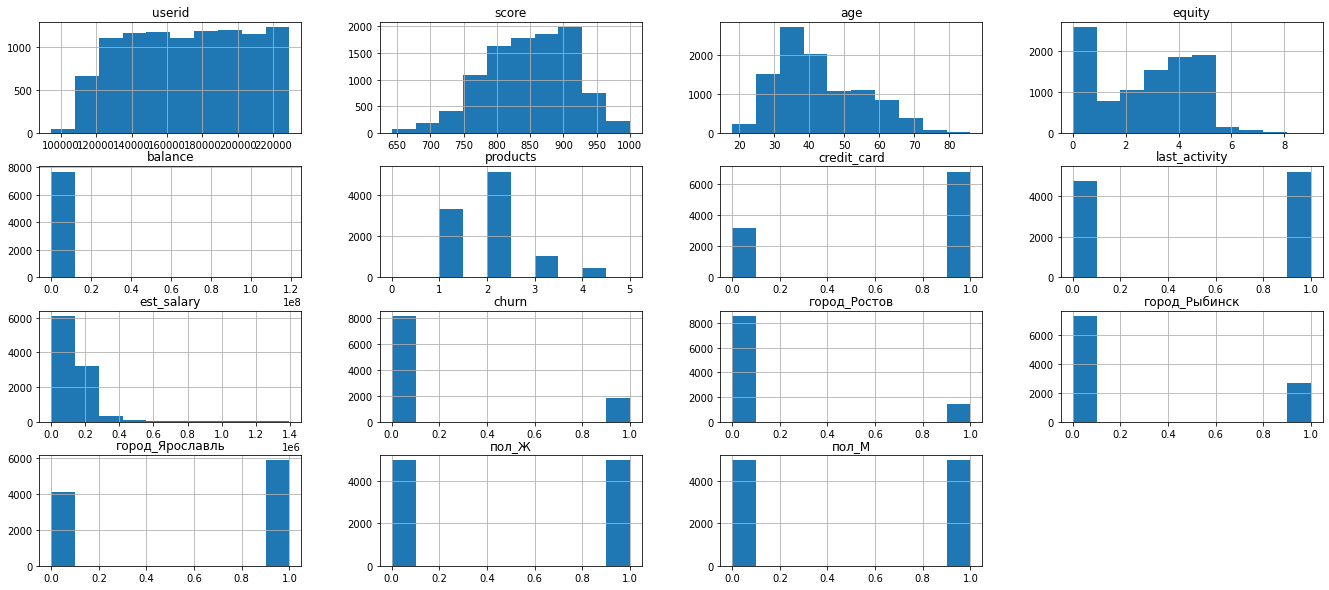

In [16]:
df.hist(figsize=(23,10));

Скор балл в основном от 800 до 900, количество баллов в собственности очень большое количество 0, а если без них смотреть, то сосредоточены от 3 до 4, количество продуктов банковских в основном 1 или 2, чаще всего клиенты имеют кредитные карты, активность примерно одинаковая

In [17]:
round(df.describe(), 2)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,город_Ростов,город_Рыбинск,город_Ярославль,пол_Ж,пол_М
count,9974.00,9974.00,9974.00,9974.00,7.695000e+03,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.0,9974.0
mean,171755.22,848.68,42.73,2.63,8.272456e+05,1.87,0.68,0.52,147786.32,0.18,0.14,0.27,0.59,0.5,0.5
std,33695.53,65.40,12.18,1.98,1.980327e+06,0.79,0.47,0.50,139285.51,0.39,0.35,0.44,0.49,0.5,0.5
min,94561.00,642.00,18.00,0.00,0.000000e+00,0.00,0.00,0.00,2546.00,0.00,0.00,0.00,0.00,0.0,0.0
25%,142760.00,802.00,33.00,0.00,2.956987e+05,1.00,0.00,0.00,75251.25,0.00,0.00,0.00,0.00,0.0,0.0
50%,172643.00,853.00,40.00,3.00,5.242953e+05,2.00,1.00,1.00,119626.50,0.00,0.00,0.00,1.00,0.0,1.0
75%,201163.75,900.00,51.00,4.00,9.800512e+05,2.00,1.00,1.00,174499.00,0.00,0.00,1.00,1.00,1.0,1.0
max,229145.00,1000.00,86.00,9.00,1.191136e+08,5.00,1.00,1.00,1395064.00,1.00,1.00,1.00,1.00,1.0,1.0


Баланс в основном сосредоточен 295 000 - 980 000, зарплата в основном сосредоточена от 75 000 до 174 500

Таким образом, открыл файл и изучил данные. Привел наименования колонок к нижнему регистру, привел колонки к соответствующему типу данных, провел работу с пропусками и дубликатами, ознакомился с аномалиями и основной концентрацией численных значений данных, в которых выявил:

скор балл в основном от 800 до 900, количество баллов в собственности очень большое количество 0, а если без них смотреть, то сосредоточены от 3 до 4, количество продуктов банковских в основном 1 или 2, чаще всего клиенты имеют кредитные карты, активность примерно одинаковая, баланс в основном сосредоточен 295 000 - 980 000, зарплата в основном сосредоточена от 75 000 до 174 500, возраст от 33 до 51, мужчин и женщин одинаковое количество

В основном клиенты находятся в Ярославле около 59 %, в Рыбинске около 27 % и в Ростове 14 %

Отток клиентов из банка составляет 18.24 %

## Исследовательский анализ данных

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался и сделаю визуализацию через гистограмму

In [18]:
moda = pd.Series(data=df['city']).mode()

In [19]:
a = round(
    df.groupby(['churn'], as_index=False)
    .agg({'churn':'mean', 'age':'mean',
          'balance':'mean', 'est_salary':'mean',
          'score':'mean', 'products':'median', 'credit_card':'median',
          'last_activity':'median', 'equity':'median', 'gender':pd.Series.mode,  'city':pd.Series.mode}), 2)
a.T

,0,1
churn,0,1
age,43.02,41.45
balance,733031.63,1134458.21
est_salary,147674.15,148289.2
score,845.4,863.42
products,2,2
credit_card,1,1
last_activity,0,1
equity,3,4
gender,Ж,М


In [20]:
moda = pd.Series(data=df['city']).mode()
moda

0    Ярославль
dtype: object

In [21]:
df.balance.max()

119113552.01

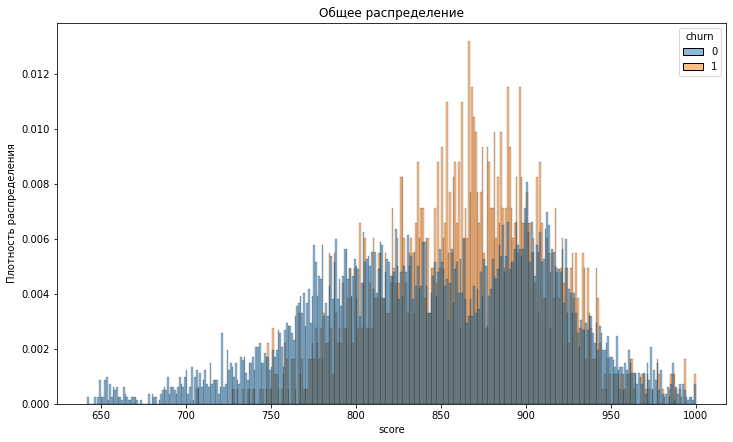

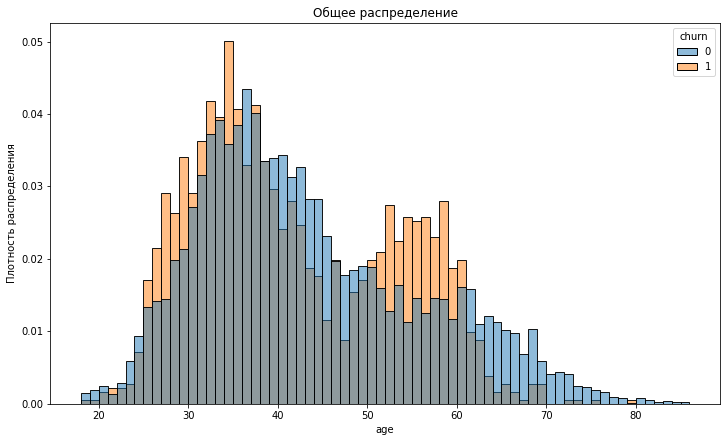

In [22]:
# создал список с наименованием колонок
list_name_columns = ['score', 'age']

# прошелся циклом для построения графиков с целью визуализации и выявления наиболее слабых сторон
for name_column in list_name_columns:
    plt.figure(figsize=(12, 7))
    sns.histplot(data=df, x=name_column, hue='churn', 
                 stat='density', common_norm=False, binwidth=1)
    plt.title('Общее распределение')
    plt.ylabel('Плотность распределения')
    plt.xlabel(name_column)
plt.show()

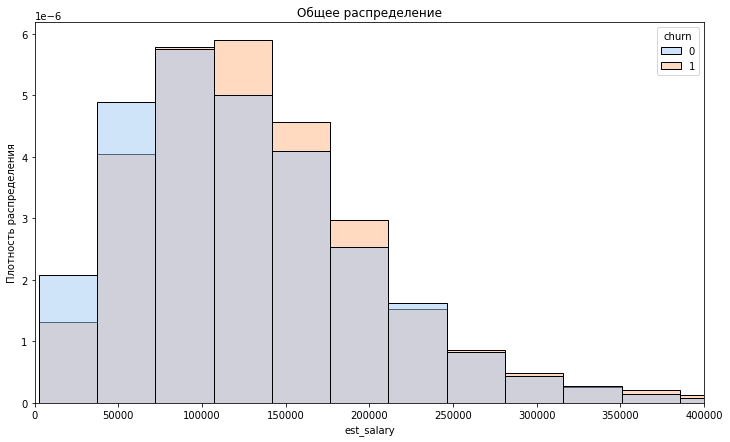

In [23]:
plt.figure(figsize=(12, 7))
sns.histplot(data=round(df, 2), x='est_salary', hue='churn', 
             stat='density', common_norm=False,  palette='pastel', bins=40)
plt.title('Общее распределение')
plt.ylabel('Плотность распределения')
plt.xlim(0, 400000)
plt.xlabel('est_salary')
plt.show()

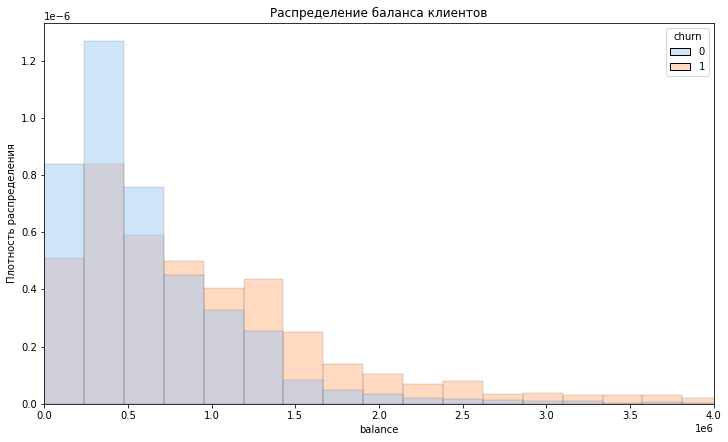

In [24]:
plt.figure(figsize=(12, 7))
sns.histplot(data=round(df, 2), x='balance', hue='churn', 
             stat='density', common_norm=False,  palette='pastel', bins=500)
plt.title('Распределение баланса клиентов')
plt.ylabel('Плотность распределения')
plt.xlabel('Баланс')
plt.xlim(right=4000000)
plt.xlim(left=0)
plt.xlabel('balance');

Создам список наименования колонок и сделаю цикл, в котором посчитаю количество ушедших и не ушедших клиентов, вычислю долю в процентах, затем построю графики долей и общего количества

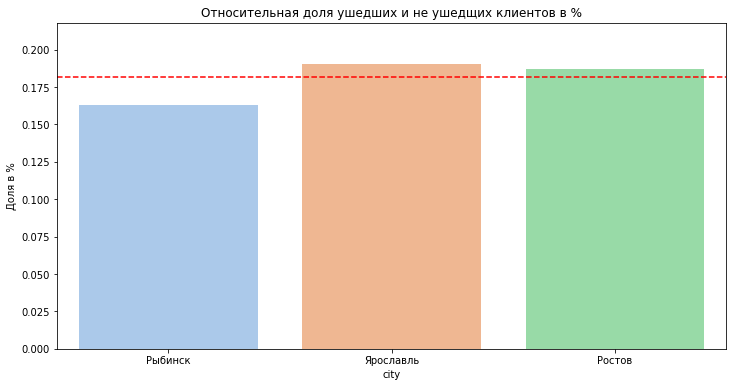

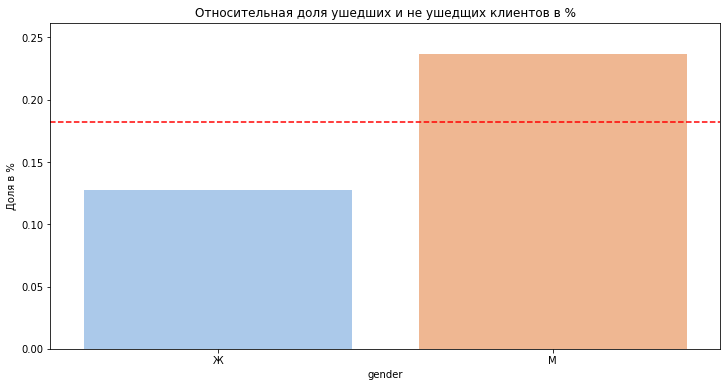

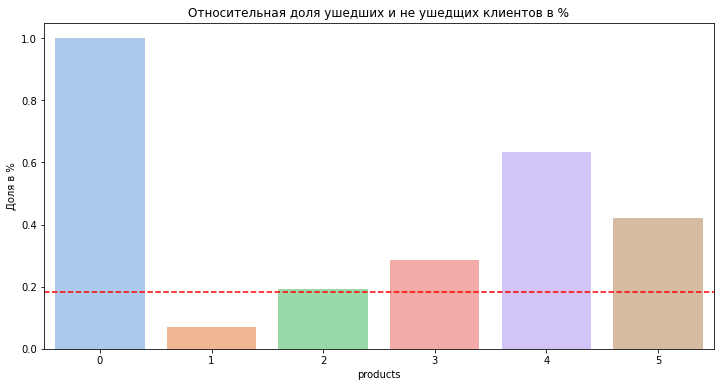

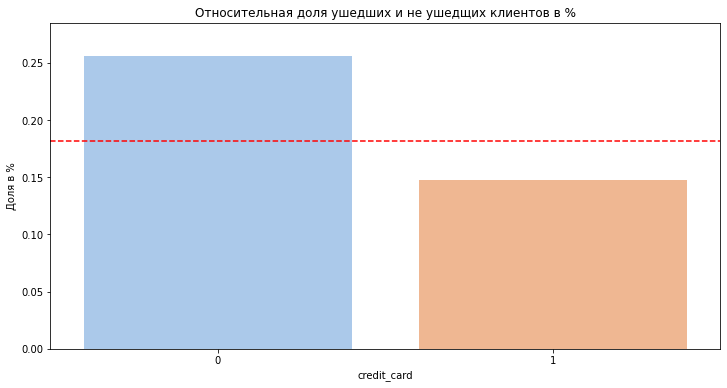

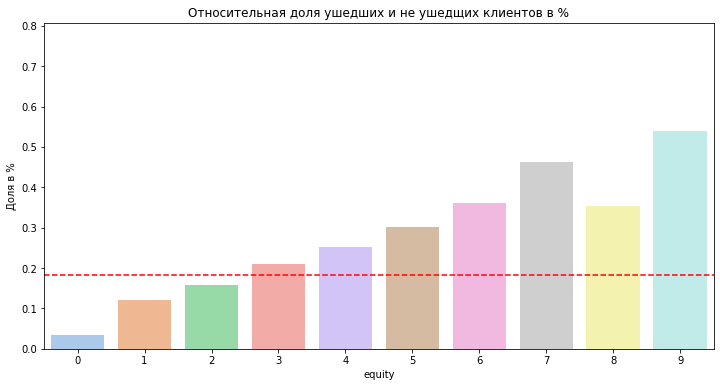

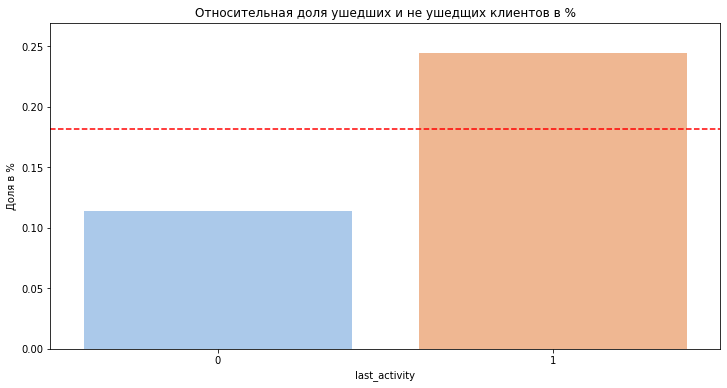

In [25]:
list_name_columns_2 = ['city', 'gender', 'products', 'credit_card', 'equity', 'last_activity']
for name_column in list_name_columns_2:
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=df, 
        x=name_column, y='churn', palette='pastel', errwidth=0
    )
    plt.title('Относительная доля ушедших и не ушедщих клиентов в %')
    plt.axhline(y = 0.182, color = 'r', linestyle ='--') 
    plt.ylabel('Доля в %')
    plt.xlabel(name_column)
    print('')
plt.show()

В продуктах, где клиенты не пользуются вовсе продуктами банка 100 % отток, нужно посмотреть с чем это связано

In [26]:
product_0 = df.loc[df['products'] == 0]
product_0.head(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,город_Ростов,город_Рыбинск,город_Ярославль,пол_Ж,пол_М
8957,147837,962,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063,1,0,1,0,1,0


Это всего лишь один клиент, который ушел, больше клиентов, которые не пользуются совсем продуктами банка нет, скорее всего это ошибка, иначе как клиент взаимодействовал с банком, уберем его

По скор баллу в основном уходят те, кто имеют скор балл в диапазоне 830 - 900

По городу оттока явного не выявлено, везде примерно одинаково, чуть лучше ситуация смотрится в Рыбинске.

По гендерному признаку уходит больше лиц мужского пола.

По возрасту уходят в основном лица 25-35 лет, а также клиенты, в возрасте от 50 до 60 лет

Количество продуктов, которыми пользуются клиенты, от 2 и выше чаще всего уходят, есть те, кто не пользуется вовсе, она пустая, но в % соотношении есть те, кто не пользовался ни 1 продуктом банка и ушел

Чаще всего уходят те, кто не пользуется кредитными картами

По количеству баллов собственности уходят в основном те, у кого ее много, от 3 и выше, и чем выше этот балл, тем больше отток

По балансу в среднем у уходящих 1 134 458 и зарплата в среднем около 150 000

Уходят в основном наиболее активные клиенты

В продуктах, где клиенты не пользуются вовсе продуктами банка 100 % отток, это связано с тем, что это всего лишь один клиент, который ушел, больше клиентов, которые не пользуются совсем продуктами банка, нет

Построим матрицы корреляций, необходимо выявить взаимосвязи наиболее выраженные

In [27]:
without_churn = df.loc[df['churn'] == 0]
with_churn = df.loc[df['churn'] == 1]

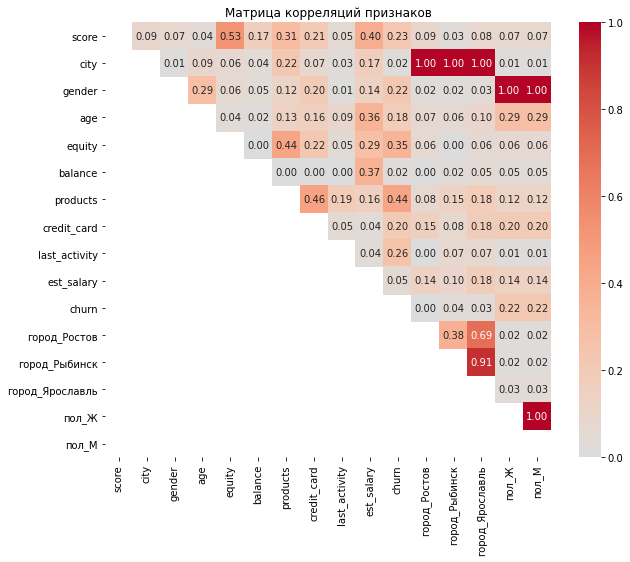

In [28]:
matrix_corr = df.drop(columns=('userid')).phik_matrix(interval_cols=['score', 'balance', 'age', 'est_salary'])

mask = np.tril(matrix_corr.corr())
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, cmap='coolwarm', annot = True, fmt='.2f', center=0, mask=mask) 
plt.title('Матрица корреляций признаков');

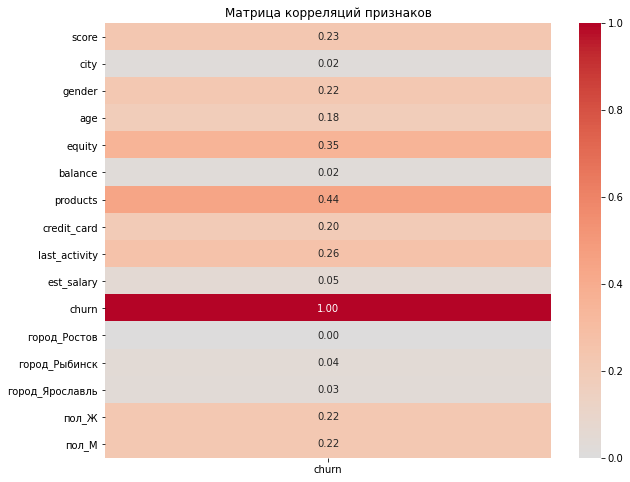

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr[['churn']], cmap='coolwarm', annot = True, fmt='.2f', center=0) 
plt.title('Матрица корреляций признаков');

По шкале Чеддока имеют прямую слабую связь с оттоком (от 0.1 до 0.3): 
- скор балл
- гендерный признак
- возраст
- использование кредитной карты
- активность

Умеренную прямую связь с оттоком имеют (от 0.3 до 0.5):
- количество используемых продуктов
- количество баллов в собственности

Получается, что те, кто с высокой активностью, высоким скор баллом, пользующихся большим количеством продуктов банка, в том числе кредитными картами, большим количеством баллов собственности наиболее склонны к оттоку из банка

**ПРОМЕЖУТОЧНЫЙ ВЫВОД**:

По скор баллу в основном уходят те, кто имеют скор балл в диапазоне 830 - 900

По городу оттока явного не выявлено, везде примерно одинаково, чуть лучше ситуация смотрится в Рыбинске.

По гендерному признаку уходит больше лиц мужского пола.

По возрасту уходят в основном лица от 25-35 лет, а также клиенты, в возрасте от 50 до 60 лет

Количество продуктов, которыми пользуются клиенты, от 2 и выше чаще всего уходят, есть те, кто не пользуется вовсе, она пустая, но в % соотношении есть те, кто не пользовался ни 1 продуктом банка и ушел

Чаще всего уходят те, кто не пользуется кредитными картами

По количеству баллов собственности уходят в основном те, у кого ее много, от 3 и выше, и чем выше этот балл, тем больше отток

По балансу в среднем у уходящих 1 134 458 и зарплата в среднем около 150 000

Уходят в основном наиболее активные клиенты

В продуктах, где клиенты не пользуются вовсе продуктами банка 100 % отток, это связано с тем, что это всего лишь один клиент, который ушел, больше клиентов, которые не пользуются совсем продуктами банка, нет

По шкале Чеддока имеют прямую слабую связь с оттоком (от 0.1 до 0.3): 
- скор балл
- гендерный признак
- возраст
- использование кредитной карты
- активность

Умеренную прямую связь с оттоком имеют (от 0.3 до 0.5):
- количество используемых продуктов
- количество баллов в собственности

Получается, что те, кто с высокой активностью, высоким скор баллом, пользующихся большим количеством продуктов банка, в том числе кредитными картами, большим количеством баллов собственности наиболее склонны к оттоку из банка

## Проверка гипотез

Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.

Н0: разницы между зарплатами нет

Н1: разница между зарплатами есть

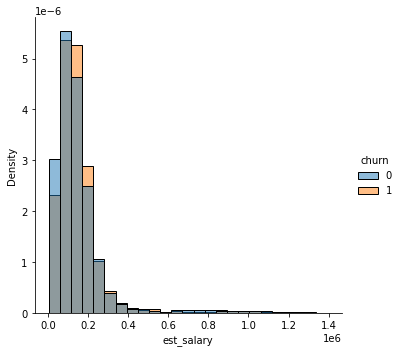

In [30]:
sns.displot(df, x='est_salary', hue='churn', stat='density', common_norm=False, bins=25);

На первый взгляд, по графику видно, что зарплаты одинаковые, проверим через тест Стъюдента

Прежде чем его запустить, проверю дисперсии, разные они или нет

In [31]:
np.var(without_churn.est_salary)

20356343170.08858

In [32]:
np.var(with_churn.est_salary)

15104005176.193928

Дисперсии разные, значит нужно добавить equal_var = False, задам статистический критерий 5 % для всех последующих проверок гипотез он будет одинаковым

In [33]:
alpha = .05

In [34]:
t_val, p_val = st.ttest_ind(without_churn['est_salary'], with_churn['est_salary'], equal_var = False)

print('Статистики=%.3fm p_value=%.3f' % (t_val, p_val))

if p_val > alpha:
    print('Одинаковые зарплаты')
else:
    print('Разные зарплаты')

Статистики=-0.187m p_value=0.852
Одинаковые зарплаты


График показывал, что нет разницы в зарплатах и на самом деле ее нет, что подтвердил тест Стъюдента

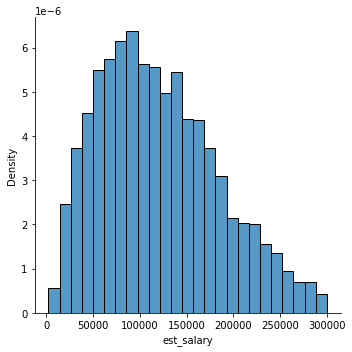

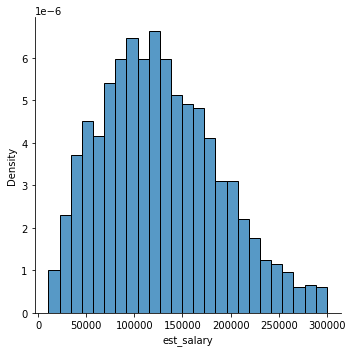

In [35]:
truncated_0 = without_churn.loc[without_churn['est_salary'] < 300000]
truncated_1 = with_churn.loc[with_churn['est_salary'] < 300000]

sns.displot(truncated_0, x='est_salary', stat='density', common_norm=False, bins=25)
sns.displot(truncated_1, x='est_salary', stat='density', common_norm=False, bins=25);

In [36]:
np.var(truncated_0.est_salary)

4011135540.793037

In [37]:
np.var(truncated_1.est_salary)

3680004672.7248254

In [38]:
t_val, p_val = st.ttest_ind(truncated_0['est_salary'], truncated_1['est_salary'], equal_var = False)

print('Статистики=%.3fm p_value=%.3f' % (t_val, p_val))

if p_val > alpha:
    print('Одинаковые зарплаты')
else:
    print('Разные зарплаты')

Статистики=-3.978m p_value=0.000
Разные зарплаты


Если отсечь зарплаты до 300 000, то зарплаты получаются разные

Проверим также разницу возрастов

Н0: разницы в возрасте нет

Н1: разница в возрасте есть

Проверим дисперсии

In [39]:
np.var(without_churn.age)

153.12697193891648

In [40]:
np.var(with_churn.age)

124.84455601356521

Дисперсии разные, следует добавить equal_var = False

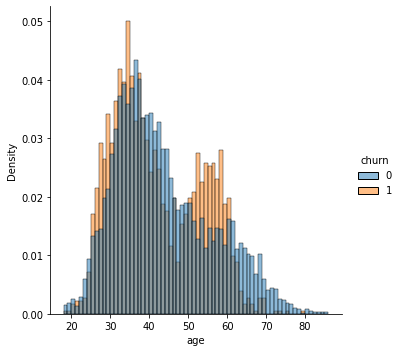

In [41]:
sns.displot(df, x='age', hue='churn', stat='density', common_norm=False, binwidth=1, bins=20);

График показывает разный возраст на первый взгляд, проверим через тест Стъюдента

In [42]:
t_val, p_val = st.ttest_ind(without_churn['age'], with_churn['age'], equal_var = False)

print('Статистики=%.3fm p_value=%.3f' % (t_val, p_val))

if p_val > alpha:
    print('Одинаковый возраст')
else:
    print('Разный возраст')

Статистики=5.311m p_value=0.000
Разный возраст


Возраст на самом деле разный, график это подтверждает

Проверим разницу скор баллов

Н0: разницы в скор баллах нет

Н1: разница в скор баллах есть

Проверим дисперсии

In [43]:
np.var(without_churn.score)

4622.495755016333

In [44]:
np.var(with_churn.score)

2460.888380877313

Дисперсии разные, следует добавить equal_var = False

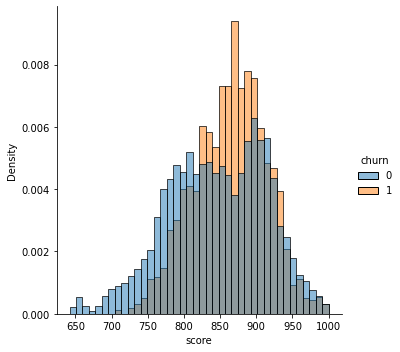

In [45]:
sns.displot(df, x='score', hue='churn', stat='density', common_norm=False);

График показывает различие в скор баллах, проверим

In [46]:
t_val, p_val = st.ttest_ind(without_churn['score'], with_churn['score'], equal_var = False)

print('Статистики=%.3fm p_value=%.3f' % (t_val, p_val))

if p_val > alpha:
    print('Одинаковые скор баллы')
else:
    print('Разные скор баллы')

Статистики=-13.003m p_value=0.000
Разные скор баллы


Разница в скор баллах действительно присутствует

Проверим также разницу баллов собственности

Н0: разницы в баллах собственности нет

Н1: разница в баллах собственности есть

Проверим дисперсии

In [47]:
np.var(without_churn.equity)

3.8837471867304267

In [48]:
np.var(with_churn.equity)

2.513951294759579

Дисперсии разные, следует добавить equal_var = False

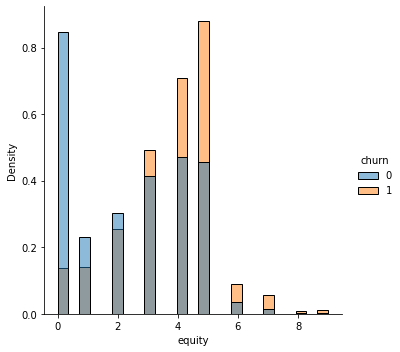

In [49]:
sns.displot(df, x='equity', hue='churn', stat='density', common_norm=False);

График показывает разницу в баллах собственности, проверим

In [50]:
results = st.ttest_ind(without_churn['equity'], with_churn['equity'], equal_var = False)

print('p_value=%.3f' % results.pvalue)

if results.pvalue > alpha:
    print('Одинаковые баллы собственности')
else:
    print('Разные баллы собственности')

p_value=0.000
Разные баллы собственности


Действительно, разница в баллах собственности присутствует

Сформулировал ряд гипотез и проверил их через тест Стъюдента, получил следующие результаты:
- зарплаты одинаковые между теми, кто уходит и кто не уходит из банка
- возраст уходящих и не уходящих клиентов разный
- разница в скор баллах присутствует
- также есть разница по баллам собственности

**ПРОМЕЖУТОЧНЫЙ ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ**

По скор баллу в основном уходят те, кто имеют скор балл в диапазоне 830 - 900

По городу оттока явного не выявлено, везде примерно одинаково, чуть лучше ситуация смотрится в Рыбинске.

По гендерному признаку уходит больше лиц мужского пола.

По возрасту уходят в основном лица от 25-35 лет, а также клиенты, в возрасте от 50 до 60 лет

Количество продуктов, которыми пользуются клиенты, от 2 и выше чаще всего уходят, есть те, кто не пользуется вовсе, она пустая, но в % соотношении есть те, кто не пользовался ни 1 продуктом банка и ушел

Чаще всего уходят те, кто не пользуется кредитными картами

По количеству баллов собственности уходят в основном те, у кого ее много, от 3 и выше, и чем выше этот балл, тем больше отток

По балансу в среднем у уходящих 1 134 458 и зарплата в среднем около 150 000

Уходят в основном наиболее активные клиенты

По шкале Чеддока имеют прямую слабую связь с оттоком (от 0.1 до 0.3): 
- скор балл
- гендерный признак
- возраст
- использование кредитной карты
- активность

Умеренную прямую связь с оттоком имеют (от 0.3 до 0.5):
- количество используемых продуктов
- количество баллов в собственности

Получается, что те, кто с высокой активностью, высоким скор баллом, пользующихся большим количеством продуктов банка, в том числе кредитными картами, большим количеством баллов собственности наиболее склонны к оттоку из банка

Сформулировал ряд гипотез и проверил их через тест Стъюдента, получил следующие результаты:
- зарплаты одинаковые между теми, кто уходит и кто не уходит из банка, но в разрезе наиболее встречающихся зарплат до 300 000 разница все таки есть
- возраст уходящих и не уходящих клиентов разный
- разница в скор баллах присутствует
- также есть разница по баллам собственности

## Сегментация клиентов

Сделаю кластеры клиентов

Для этого, сначала подберу количество кластеров с помощью метода локтя

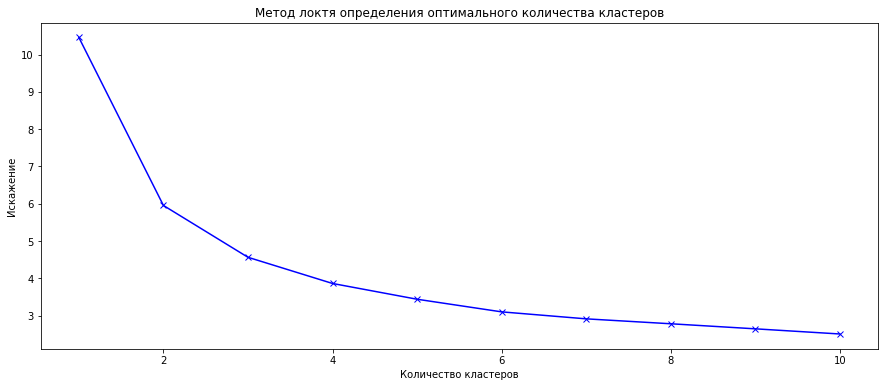

In [51]:
# исключаю признаки из датафрейма
X = df.drop([ 'city', 'gender', 'userid', 
                   'credit_card', 'score', 'balance', 'est_salary', 'город_Ростов',
                  'город_Рыбинск', 'город_Ярославль', 'пол_Ж', 'пол_М'], axis = 1)

# kmeans определить количество кластеров с помощью цикла
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# построение графика
plt.figure(figsize=(15,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение')
plt.title('Метод локтя определения оптимального количества кластеров')
plt.show()

Оптимальное количество кластеров находится в диапазоне от 5 до 6, выберу 6 кластеров

In [52]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc = scaler.fit_transform(df.drop(columns = ['churn', 'city', 'gender', 'userid', 
                   'credit_card', 'score', 'balance', 'est_salary', 'город_Ростов',
                  'город_Рыбинск', 'город_Ярославль', 'пол_Ж'])) # обучаем нормализатор и преобразуем набор данных 

# задаём модель k_means 
km = KMeans(n_clusters = 6, random_state = 0) 

In [53]:
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

In [54]:
# переименую кластеры в группы с номером
df.loc[df['cluster_km'] == 0, 'cluster_km'] = 'группа_1'
df.loc[df['cluster_km'] == 1, 'cluster_km'] = 'группа_2'
df.loc[df['cluster_km'] == 2, 'cluster_km'] = 'группа_3'
df.loc[df['cluster_km'] == 3, 'cluster_km'] = 'группа_4'
df.loc[df['cluster_km'] == 4, 'cluster_km'] = 'группа_5'
df.loc[df['cluster_km'] == 5, 'cluster_km'] = 'группа_6'

In [55]:
b = round(df.groupby(['cluster_km'], as_index=False).agg({'churn':'mean', 'age':'mean',
          'balance':'mean', 'est_salary':'mean',
          'score':'mean', 'products':'median', 'credit_card':'median',
          'last_activity':'median', 'equity':'median', 'gender':pd.Series.mode,  'city':pd.Series.mode}), 2)

b.sort_values(by='churn', ascending=False)

,cluster_km,churn,age,balance,est_salary,score,products,credit_card,last_activity,equity,gender,city
0,группа_1,0.45,40.19,1187224.70,141261.40,847.52,2,1,1,4,М,Ярославль
3,группа_4,0.25,46.18,789917.76,116045.73,844.91,2,1,1,4,Ж,Ярославль
2,группа_3,0.23,40.77,941282.26,137317.63,850.54,2,1,0,4,М,Ярославль
1,группа_2,0.07,45.78,764660.12,119461.25,847.79,2,1,0,4,Ж,Ярославль
5,группа_6,0.06,40.99,291623.43,188423.21,848.15,1,1,1,0,М,Ярославль
4,группа_5,0.05,41.45,224896.89,193656.13,854.74,1,1,0,0,М,Ярославль


In [56]:
# выводим статистику наших признаков по кластеру
klust = (
    df.groupby(['cluster_km'])
    .agg({'churn':'mean', 'age':'median', 'products':'median','last_activity':'median',
          'equity':'median', 'пол_М':'mean'})
    .sort_values(by='churn', ascending=False)
    .reset_index()
)
klust

,cluster_km,churn,age,products,last_activity,equity,пол_М
0,группа_1,0.448119,38.0,2,1,4,1.000000
1,группа_4,0.252770,43.0,2,1,4,0.000000
2,группа_3,0.226523,39.0,2,0,4,1.000000
3,группа_2,0.065426,43.0,2,0,4,0.000000
4,группа_6,0.060180,39.0,1,1,0,0.582115
5,группа_5,0.048936,39.0,1,0,0,0.594326


In [57]:
klust_means = df.groupby('cluster_km', as_index=False).agg({'products':'mean',
          'equity':'mean'})
klust_means.columns = ['cluster_km', 'prod_mean', 'equity_mean']
klust_means

,cluster_km,prod_mean,equity_mean
0,группа_1,2.327497,3.985733
1,группа_2,2.088550,3.472645
2,группа_3,2.105330,3.798223
3,группа_4,2.187863,3.618997
4,группа_5,1.231915,0.281560
5,группа_6,1.222160,0.391451


In [58]:
klust = klust.merge(klust_means, on='cluster_km', how='inner')
klust

,cluster_km,churn,age,products,last_activity,equity,пол_М,prod_mean,equity_mean
0,группа_1,0.448119,38.0,2,1,4,1.000000,2.327497,3.985733
1,группа_4,0.252770,43.0,2,1,4,0.000000,2.187863,3.618997
2,группа_3,0.226523,39.0,2,0,4,1.000000,2.105330,3.798223
3,группа_2,0.065426,43.0,2,0,4,0.000000,2.088550,3.472645
4,группа_6,0.060180,39.0,1,1,0,0.582115,1.222160,0.391451
5,группа_5,0.048936,39.0,1,0,0,0.594326,1.231915,0.281560


In [62]:
klust = b.merge(klust_means, on='cluster_km', how='inner')
klust

,cluster_km,churn,age,balance,est_salary,score,products,credit_card,last_activity,equity,gender,city,prod_mean,equity_mean
0,группа_1,0.45,40.19,1187224.70,141261.40,847.52,2,1,1,4,М,Ярославль,2.327497,3.985733
1,группа_2,0.07,45.78,764660.12,119461.25,847.79,2,1,0,4,Ж,Ярославль,2.088550,3.472645
2,группа_3,0.23,40.77,941282.26,137317.63,850.54,2,1,0,4,М,Ярославль,2.105330,3.798223
3,группа_4,0.25,46.18,789917.76,116045.73,844.91,2,1,1,4,Ж,Ярославль,2.187863,3.618997
4,группа_5,0.05,41.45,224896.89,193656.13,854.74,1,1,0,0,М,Ярославль,1.231915,0.281560
5,группа_6,0.06,40.99,291623.43,188423.21,848.15,1,1,1,0,М,Ярославль,1.222160,0.391451


In [64]:
klust.columns = ['Группы', 'Отток', 'Возраст', 'Баланс', 'Зарплата', 'Скор балл', 'Продукты банка', 'Кредитная карта',
                 'Активность', 'Баллы собственности', 'Пол', 'Город', 'Ср продукты', 'Ср баллы собств-ти']
klust.sort_values(by='Отток', ascending=False)

,Группы,Отток,Возраст,Баланс,Зарплата,Скор балл,Продукты банка,Кредитная карта,Активность,Баллы собственности,Пол,Город,Ср продукты,Ср баллы собств-ти
0,группа_1,0.45,40.19,1187224.70,141261.40,847.52,2,1,1,4,М,Ярославль,2.327497,3.985733
3,группа_4,0.25,46.18,789917.76,116045.73,844.91,2,1,1,4,Ж,Ярославль,2.187863,3.618997
2,группа_3,0.23,40.77,941282.26,137317.63,850.54,2,1,0,4,М,Ярославль,2.105330,3.798223
1,группа_2,0.07,45.78,764660.12,119461.25,847.79,2,1,0,4,Ж,Ярославль,2.088550,3.472645
5,группа_6,0.06,40.99,291623.43,188423.21,848.15,1,1,1,0,М,Ярославль,1.222160,0.391451
4,группа_5,0.05,41.45,224896.89,193656.13,854.74,1,1,0,0,М,Ярославль,1.231915,0.281560


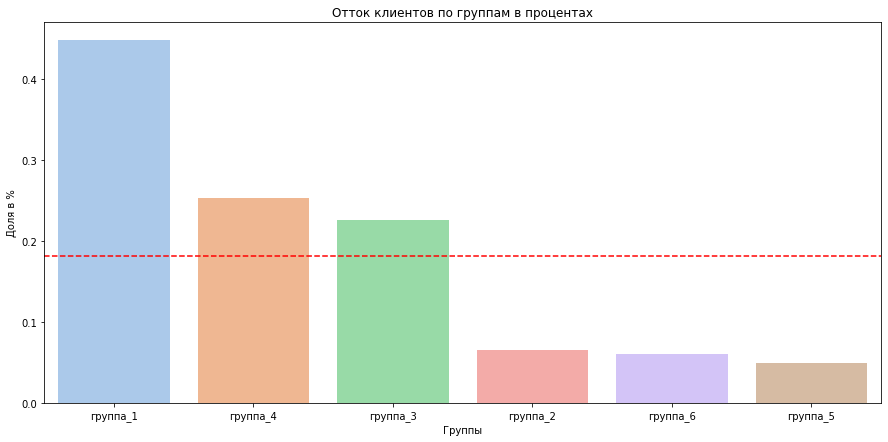

In [60]:
plt.figure(figsize=(15,7))
sns.barplot(
        data=klust, 
        x='Группы', y='Отток', palette='pastel', errwidth=0
    )
plt.title('Отток клиентов по группам в процентах')
plt.axhline(y = 0.182, color = 'r', linestyle ='--') 
plt.ylabel('Доля в %')
plt.xlabel('Группы');

In [61]:
# проверю по количеству клиентов в каждой группе, должно получиться не менее 500 в группе
df.groupby(['cluster_km'])['userid'].count()

cluster_km
группа_1    1542
группа_2    1773
группа_3    1576
группа_4    1895
группа_5    1410
группа_6    1778
Name: userid, dtype: int64

Подобрал оптимальное количество групп, а именно 6, в каждой из которых не менее 500 клиентов, и не менее 3-х групп, которые хуже по оттоку клиентов, чем по всем данным, а именно выше 18.2 %

Стоит обратить внимание на группу 4, 3 и 6, остальные намного лучше по лояльности к банку. 

Группа 1 характеризуется:
- высоким оттоком в размере 45 %
- лица мужского пола в возрасте 38 лет
- активно пользующиеся сервисами банка (в среднем 2 продукта)
- имеют в осносном по 4 балла собственности

Группа 4 характеризуется:
- высоким оттоком в размере 25 %
- лица женского пола в возрасте 43 лет
- активно пользующиеся сервисами банка (в среднем 2 продукта)
- имеют в осносном по 4 балла собственности

Группа 3 характеризуется:
- высоким оттоком в размере 22 %
- лица мужского пола в возрасте 39 лет
- активно пользующиеся сервисами банка
- имеют в осносном по 4 балла собственности

Подобрал оптимальное количество групп, а именно 6, в каждой из которых не менее 500 клиентов, и не менее 3-х групп, которые хуже по оттоку клиентов, чем по всем данным, а именно выше 18.2 %

Стоит обратить внимание на группу 4, 3 и 6, остальные намного лучше по лояльности к банку. 

Группа 1 характеризуется:
- высоким оттоком в размере 45 %
- лица мужского пола в возрасте 38 лет
- активно пользующиеся сервисами банка (в среднем 2 продукта)
- имеют в осносном по 4 балла собственности

Группа 4 характеризуется:
- высоким оттоком в размере 25 %
- лица женского пола в возрасте 43 лет
- активно пользующиеся сервисами банка (в среднем 2 продукта)
- имеют в осносном по 4 балла собственности

Группа 3 характеризуется:
- высоким оттоком в размере 22 %
- лица мужского пола в возрасте 39 лет
- активно пользующиеся сервисами банка
- имеют в осносном по 4 балла собственности

Расставлю приоритеты в порядке убывания на какую группу стоит обратить внимание в первую очередь:
- группа 1
- группа 4
- группа 3
- группа 2
- группа 6
- группа 5

## Общий вывод и рекомендации

Открыл файл и изучил данные. Привел наименования колонок к нижнему регистру, привел колонки к соответствующему типу данных, провел работу с пропусками и дубликатами, ознакомился с аномалиями и основной концентрацией численных значений данных, в которых выявил:

Портрет уходящего клиента получился следующий:

По скор баллу в основном уходят те, кто имеют скор балл в диапазоне 830 - 900

По городу оттока явного не выявлено, везде примерно одинаково, чуть лучше ситуация смотрится в Рыбинске.

По гендерному признаку уходит больше лиц мужского пола.

По возрасту уходят в основном лица от 25-35 лет, а также клиенты, в возрасте от 50 до 60 лет

Количество продуктов, которыми пользуются клиенты, от 2 и выше чаще всего уходят, есть те, кто не пользуется вовсе, она пустая, но в % соотношении есть те, кто не пользовался ни 1 продуктом банка и ушел

Чаще всего уходят те, кто не пользуется кредитными картами

По количеству баллов собственности уходят в основном те, у кого ее много, от 3 и выше, и чем выше этот балл, тем больше отток

По балансу в среднем у уходящих 1 134 458 и зарплата в среднем около 150 000

Уходят в основном наиболее активные клиенты

В продуктах, где клиенты не пользуются вовсе продуктами банка 100 % отток, это связано с тем, что это всего лишь один клиент, который ушел, больше клиентов, которые не пользуются совсем продуктами банка, нет

По шкале Чеддока имеют прямую слабую связь с оттоком (от 0.1 до 0.3): 
- скор балл
- гендерный признак
- возраст
- использование кредитной карты
- активность

Умеренную прямую связь с оттоком имеют (от 0.3 до 0.5):
- количество используемых продуктов
- количество баллов в собственности

Получается, что те, кто с высокой активностью, высоким скор баллом, пользующихся большим количеством продуктов банка, в том числе кредитными картами, большим количеством баллов собственности наиболее склонны к оттоку из банка

Сформулировал ряд гипотез и проверил их через тест Стъюдента, получил следующие результаты:
- зарплаты одинаковые между теми, кто уходит и кто не уходит из банка, но в разрезе наиболее встречающихся зарплат до 300 000 разница все таки есть
- возраст уходящих и не уходящих клиентов разный
- разница в скор баллах присутствует
- также есть разница по баллам собственности


Подобрал оптимальное количество групп, а именно 6, в каждой из которых не менее 500 клиентов, и не менее 3-х групп, которые хуже по оттоку клиентов, чем по всем данным, а именно выше 18.2 %

Стоит обратить внимание на группу 4, 3 и 6, остальные намного лучше по лояльности к банку. 

Группа 1 характеризуется:
- высоким оттоком в размере 45 %
- высокий баланс, который составляет в среднем 1 180 000
- скор балл 847
- клиенты мужского пола в возрасте 40 лет с зарплатой 140 000 рублей
- из города Ярославль
- активно пользующиеся сервисами банка (в среднем 2 продукта, в том числе кредитная карта)
- имеют в основном по 4 балла собственности


Группа 4 характеризуется:
- высоким оттоком в размере 25 %
- высокий баланс, который составляет в среднем 790 000
- скор балл 845
- клиенты женского пола в возрасте 46 лет с зарплатой 116 000 рублей
- из города Ярославль
- активно пользующиеся сервисами банка (в среднем 2 продукта, в том числе кредитная карта)
- имеют в основном по 4 балла собственности


Группа 3 характеризуется:
- высоким оттоком в размере 23 %
- высокий баланс, который составляет в среднем 940 000
- скор балл 845
- клиенты мужского пола в возрасте 40 лет с зарплатой 137 000 рублей
- из города Ярославль
- не активно пользующиеся сервисами банка (в среднем 2 продукта, в том числе кредитная карта)
- имеют в основном по 4 балла собственности


Расставлю приоритеты в порядке убывания на какую группу стоит обратить внимание в первую очередь:
- группа 1
- группа 4
- группа 3
- группа 2
- группа 6
- группа 5

**РЕКОМЕНДАЦИИ**

- сделать акцент на расширение клиентов в городе Ярославль, так как там наименьший отток клиентов и такие клиенты пользуются банковскими продуктами чаще и в большем количестве
- с клиентами мужского пола в возрасте 40 лет в городе Ярославль узнавать через возможные средства связи,в т.ч. опросы онлайн, что для них важно в банке, что можно было бы добавить, тем самым мы сможем повысить лояльность таких клиентов и вероятность того, что они останутся повысится
- клиенты в возрасте 40 лет мужского пола из Ярославля с большими балансами, чаще всего используют кредитные карты, можно для них предусмотреть более выгодные ставки как по кредитным картам, так и по вкладам и накопительным счетам